## Import Dependencies and Open Instrument Handles

In [17]:
import sys
import os
import time
import pyvisa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from binascii import unhexlify
import serial

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\Drivers")

from Driver_TECSource_5240 import *

In [18]:
rm = pyvisa.ResourceManager()

tec = TECSource_5240()
tec.open(rm)

## Initialization

In [19]:
T_Start = 23
T_Stop = 50
T_Step = 0.2
t_wait = 5
n = int((T_Stop-T_Start)/T_Step+1)

## Measurement Routine

In [24]:
meas_df = pd.DataFrame()
t0 = time.time()
for k in range(0,n+1,1):
    if(T_Start+k*T_Step>47):
        T_Set = 47
    else:
        T_Set = T_Start+k*T_Step
    tec.set_temperature(T_Set)
    time.sleep(t_wait)
    T_read = tec.get_temperature()
    t_meas = time.time()-t0
    dict = {'Time_s':t_meas,'Temperature_C':T_read}
    meas_df_temp = pd.DataFrame([dict])
    data = [meas_df_temp, meas_df]
    meas_df = pd.concat(data,ignore_index=True,sort=False)
tec.set_temperature(23)

## View, Plot and Save Data

In [25]:
meas_df

,Time_s,Temperature_C
0,687.518770,47.00
1,682.500467,47.00
2,677.482163,47.00
3,672.463974,47.00
4,667.445774,47.00
...,...,...
132,25.091445,23.89
133,20.072460,23.68
134,15.050479,23.47
135,10.035412,23.26


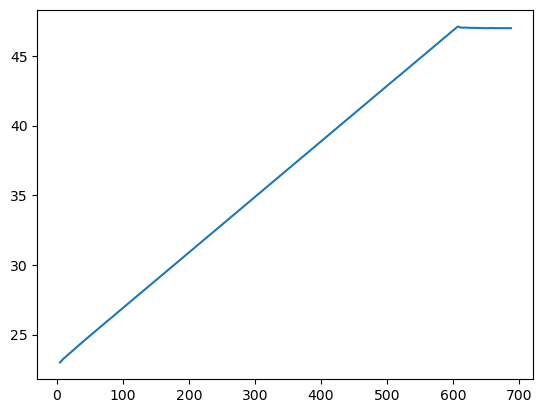

In [26]:
plt.plot(meas_df.Time_s,meas_df.Temperature_C)

In [27]:
meas_df.to_csv(r"TX-RX_Temp_Sweep_DC_2_run_2.csv")

## Close Instrument Handles

In [29]:
tec.close()